In [1]:
from PyHa.statistics import *
from PyHa.IsoAutio import *
from PyHa.visualizations import *
import pandas as pd

## Running Moment to Moment Labeling System on a Directory of WAV Files 

In [2]:
#path = "./TEST/"
#clip_path = "./TEST/ScreamingPiha2.wav"
#manual_df = pd.read_csv("ScreamingPiha_Manual_Labels.csv")


path = "./mixed_bird/Mixed_Bird/"
clip_path = "./mixed_bird/Mixed_Bird/Sporophila-lineola-408800.wav"
manual_df = pd.read_csv("./mixed_bird/mixed_bird_manual.csv")

In [3]:
# Example parameters for TweetyNET
isolation_parameters = [
    {
    "model" : "tweetynet",
    "tweety_output": False,
    "technique" : "simple",
    "threshold_type" : "median",
    "threshold_const" : 2.0,
    "threshold_min" : 0.0,
    "window_size" : 2.0,
    "chunk_size" : 5.0
    }, 
    {
    "model" : "tweetynet",
    "tweety_output": False,
    "technique" : "stack",
    "threshold_type" : "median",
    "threshold_const" : 2.0,
    "threshold_min" : 0.0,
    "window_size" : 2.0,
    "chunk_size" : 5.0
    }, 
    {
    "model" : "tweetynet",
    "tweety_output": False,
    "technique" : "steinberg",
    "threshold_type" : "median",
    "threshold_const" : 2.0,
    "threshold_min" : 0.0,
    "window_size" : 2.0,
    "chunk_size" : 5.0
    },
    {
    "model" : "tweetynet",
    "tweety_output": False,
    "technique" : "chunk",
    "threshold_type" : "median",
    "threshold_const" : 2.0,
    "threshold_min" : 0.0,
    "window_size" : 2.0,
    "chunk_size" : 5.0
    }
]

### Spectrogram Testing

No handles with labels found to put in legend.
C:\Users\seanh\OneDrive\Desktop\E4E\PyHa\PyHa\microfaune_package\microfaune\audio.py:23: WavFileWarning: Reached EOF prematurely; finished at 1441792 bytes, expected 9202220 bytes from header.
  fs, data = wavfile.read(path)


Error in detection, skipping Ardea-cocoi-414790.wav
integer division or modulo by zero
Error in detection, skipping Bartramia-longicauda-507855.wav
integer division or modulo by zero
Error in detection, skipping Coeligena-violifer-2065.wav
integer division or modulo by zero


ValueError: invalid number of data points (0) specified

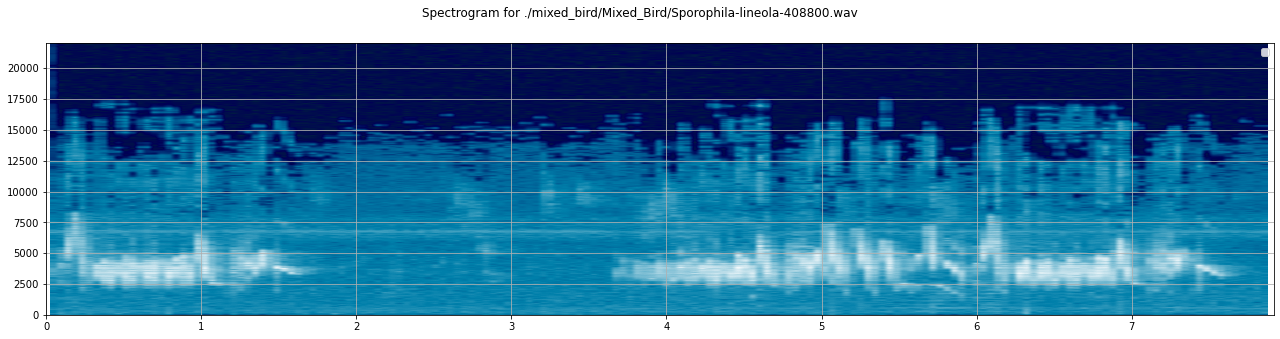

In [4]:
spectrogram_visualization(clip_path)
for i in isolation_parameters: 
    automated_df = generate_automated_labels(path,i);
    spectrogram_visualization(clip_path,automated_df = True, isolation_parameters = i)

### Histogram visualization of Annotation Length

In [ ]:
for i in isolation_parameters: 
    automated_df = generate_automated_labels(path,i);
    annotation_duration_histogram(automated_df, n_bins = 100, title = "Annotation Histogram " + i["technique"])

### Statistic compairsion between techinques

In [ ]:
datas = []

for i in isolation_parameters:
    print("progression/in progress: " + i["technique"])
    datas.append("=======================================================")
    datas.append(i["technique"])
    automated_df = generate_automated_labels(path,i);
    
    datas.append("general")
    clip_statistics_df = clip_statistics(automated_df,manual_df, stats_type = "general")
    datas.append(global_statistics(clip_statistics_df))
    
    datas.append("\n")
    datas.append("IoU")
    clip_statistics_df = clip_statistics(automated_df,manual_df, stats_type = "IoU", threshold=0.5)
    datas.append(global_statistics(clip_statistics_df))
    
for data in datas:
    print(data)
    